------------------------------------------------
##### To check for NA values 
------------------------------------------------

In [415]:
def check_NAs(d):
    return d.isna().sum().sum()

------------------------------------------------
##### Importing necessary modules
------------------------------------------------

In [5]:
import pandas as pnd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings('ignore')



path = "/Users/arifwaghbakriwala/Desktop/Projects/Sales-Analysis/Data/"

------------------------------------------------
##### Listing all of the csv files in the directory, importing and appending each individual file. (Each ".csv" corresponds to a month of sales)
- Deselected all observations that had header values imputed as cell values
- removed all observations containing na values
- transfered the data-frame to the csv file.
------------------------------------------------

In [417]:
lst = sorted(os.listdir(path))
lst = [l for l in lst if not l.startswith(".")]


df = pnd.DataFrame()

for f in lst:
    tmp = pnd.read_csv(path + f,encoding="cp1252",skip_blank_lines=True)
    df = pnd.concat([df,tmp])


df = df.loc[df["Product"] != "Product"]
df = df.dropna()
df.rename(columns={'Order ID': 'Order_ID', 'Product': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
fin_name = path + "/z_cumulative_data.csv"
df.to_csv(fin_name, index = False)

------------------------------------------------
##### Loading the concatenated data
------------------------------------------------

In [6]:
path = "/Users/arifwaghbakriwala/Desktop/Projects/Sales-Analysis/Data/"
fin_name = path + "/z_cumulative_data.csv"
data = pnd.read_csv(fin_name,skip_blank_lines=True, na_filter=True)

------------------------------------------------
#### Cleaning Step
##### Separating the "Order_Date" into "Date" and "Time", and then Splitting the "Date" into "Month", "Day" and "Year"
------------------------------------------------

In [7]:
data[["Date","Time"]] = data.Order_Date.str.split(expand=True)
data[["Month","Day","Year"]] = data.Date.str.split("/",expand=True)

data["Month"] = data["Month"].astype("int")
data["Day"] = data["Day"].astype("int")
data["Year"] = data["Year"].astype("int")

data["Revenue"] = data["Quantity_Ordered"] * data["Price_Each"]


data["Product"] = data["Product"].astype("string")
data["Product"] = data["Product"].str.strip()


------------------------------------------------
#### Cleaning Step
##### Splitting the "Purchase_Address" Column into "City", "State" and "Zip"
------------------------------------------------

In [8]:
data["City"] =  data["Purchase_Address"].str.split(", ", n = 2, expand = True)[1].str.strip()  
data[["State","Zip"]] = data["Purchase_Address"].str.split(", ", n = 2, expand = True)[2].str.strip().str.split(" ", expand = True)


------------------------------------------------
#### Cleaning Step
##### Converting Order Date into Date time format and creating indvidual hours and minutes column
------------------------------------------------

In [9]:
'''
Converting the type of order date variable into datetime format and then extracting hours and minutes from 
the order date variable as individual variables
'''
data["Order_Date"] = pnd.to_datetime(data["Order_Date"])
data["Hours"] = data["Order_Date"].dt.hour
data["Minutes"] = data["Order_Date"].dt.minute

### VISUALISATIONS

------------------------------------------------
#### VIZ 1 
##### Visualising Sales in terms of Quantity of Items Sold in each Month.
------------------------------------------------

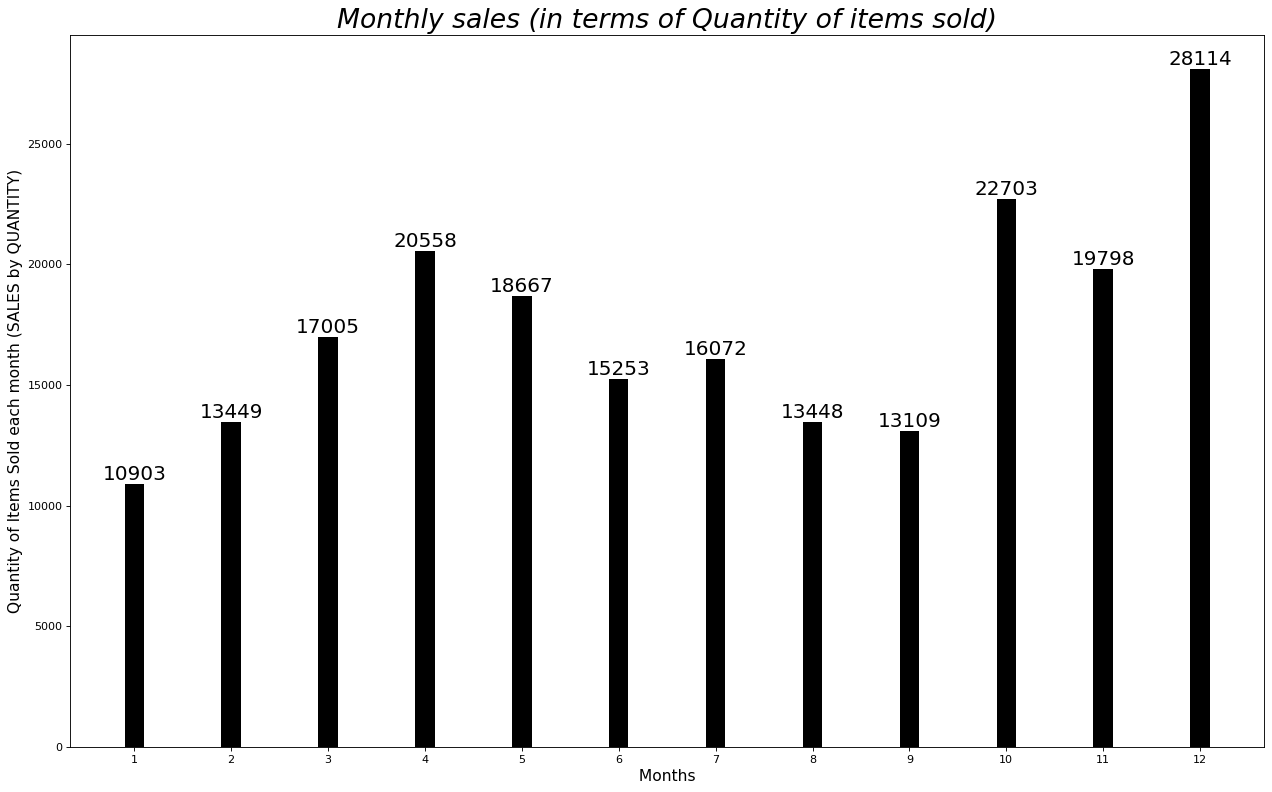

In [10]:
temporary_storage_1 = pnd.DataFrame(data.groupby('Month')['Quantity_Ordered'].sum())

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(temporary_storage_1.index, temporary_storage_1['Quantity_Ordered'], width=.2, color = "black")
plt.xticks(temporary_storage_1.index)
plt.xlabel(" Months ", fontdict={'fontweight':500, 'size':14})
plt.ylabel(" Quantity of Items Sold each month (SALES by QUANTITY) ", fontdict={'fontweight':500, 'size':14})
plt.title("Monthly sales (in terms of Quantity of items sold)", fontdict={'fontweight':200, 'size':24,'fontstyle':'italic'})

for i, val in enumerate(temporary_storage_1["Quantity_Ordered"].values):
    plt.text(i+1, val, val, ha='center', va='bottom', fontdict={'fontweight':500, 'size':18})

    
plt.tight_layout()
plt.show()

## Inference [Quantity of items sold each month]

`The bar chart above clearly shows that highest amount of deliveries made or the number of people served were in Decemeber, probably higher demand due to christmas celebrations and vacations period. Also, significantly high sales can be observed in 10th month, which is month of October, maybe high sales due to the fact that this month had a thanksgiving break and celebrations and bonuses recieved resulted in accomplishing more needs.`

------------------------------------------------
#### VIZ 2
##### Visualising Sales in terms of Revenue Generated each Month.
------------------------------------------------

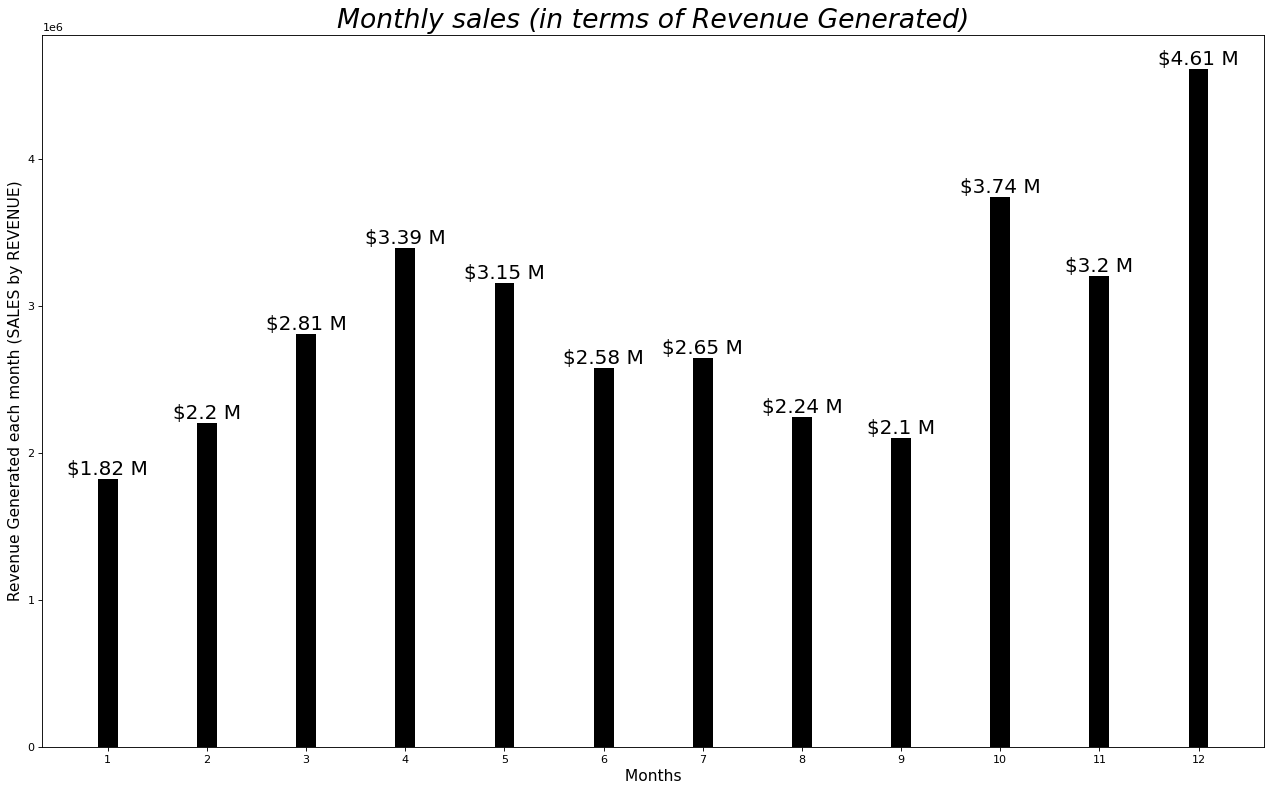

In [11]:
temporary_storage_2 = pnd.DataFrame(data.groupby('Month')['Revenue'].sum())

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(temporary_storage_2.index, temporary_storage_2['Revenue'], width=.2, color = "black")
plt.xticks(temporary_storage_2.index)
plt.xlabel(" Months ", fontdict={'fontweight':500, 'size':14})
plt.ylabel(" Revenue Generated each month (SALES by REVENUE) ", fontdict={'fontweight':500, 'size':14})
plt.title("Monthly sales (in terms of Revenue Generated)", fontdict={'fontweight':200, 'size':24,'fontstyle':'italic'})


for i, val in enumerate(temporary_storage_2["Revenue"].values):
    plt.text(i+1, val, "$" + str(round(val/1000000,2))+" M", ha='center', va='bottom', fontdict={'fontweight':500, 'size':18})

    
plt.tight_layout()
plt.show()

## Inference [Revenue Generated each month]

`As can be manifested from the above pictorial representation of the sales in terms of revenue generated, the trend pattern completely follows the prior bar chart depicting sales in terms of Quantity of items sold each month. The more the number of items sold, the greater the revenue generated. And all the larger amount of sales and revennue generation can be observed in the months of holidays, following the order : Christmas holidays bringing in the largest chunk of profits, followed by the earnings of Thanksgiving and then the takings of the SUMMERS.`

------------------------------------------------
#### VIZ 3
##### Visualising Sales City Wise (w.r.t quantity of items).
- Boston, Massaschussetts (MA)
- Portland, Maine (ME)
- Portland, Oregon (OR)
- San Francisco, California (CA)
- Los Angeles, California (CA)
- Austin, Texas (TX)
- Atlanta, Georgia (GA)
- Seattle, Washington (WA)
- New York City, New York (NY)
- Dallas, Texas (TX)
------------------------------------------------

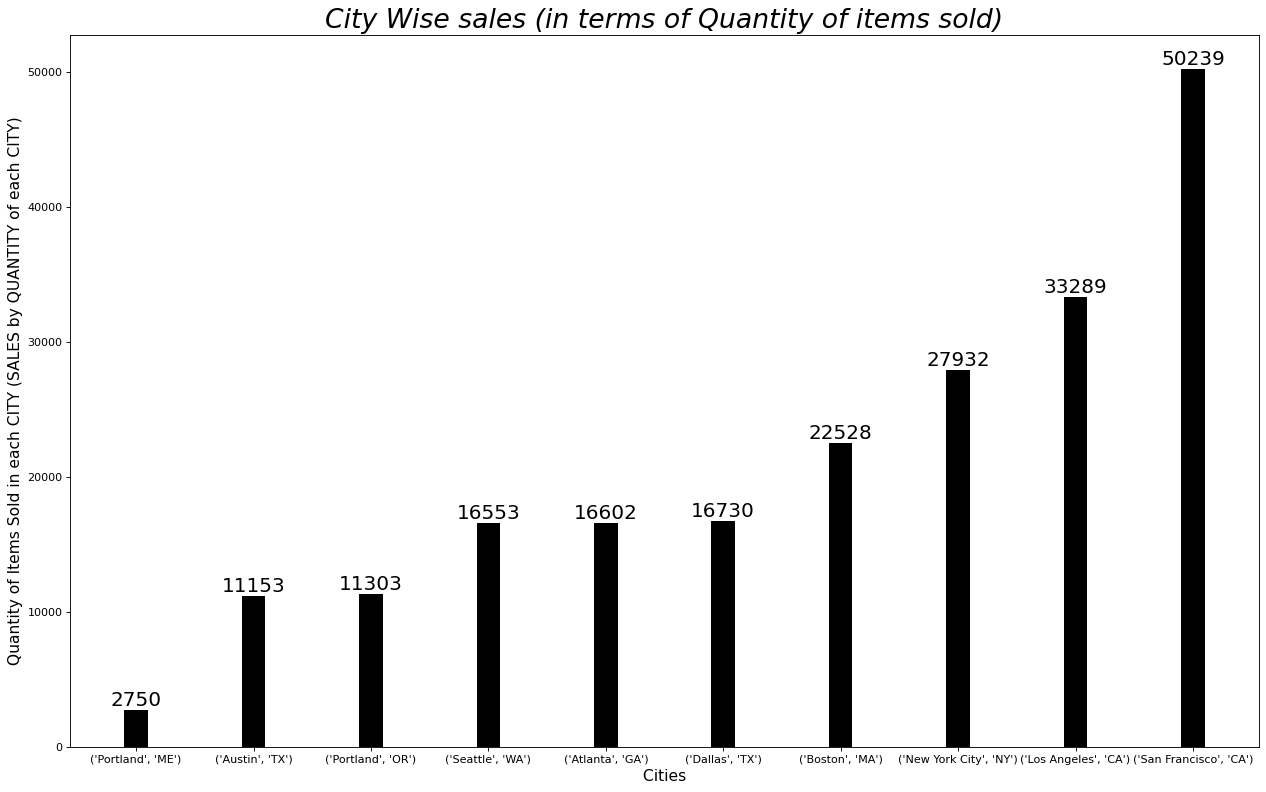

In [12]:
temporary_storage_3 = pnd.DataFrame(data.groupby(['City','State'])['Quantity_Ordered'].sum()).sort_values('Quantity_Ordered')

plt.figure(figsize=(16,10), dpi = 80)
plt.bar(pnd.DataFrame(temporary_storage_3.index)[0].astype("string"), temporary_storage_3["Quantity_Ordered"], width=.2, color = "black")
#On extracting the data based on group-by statement, the resulting data spits out a tuple in indices (binding the two columns that were used for grouping purpose)
#plt.bar() procedure cannot process tuple passsed as a variable of a dataframe.
#So converting the result of the groupby function into a dataframe, and then the column containing the tuple into a string, and passing that column as 'x' variable.

plt.xlabel(" Cities ", fontdict={'fontweight':500, 'size':14})
plt.ylabel(" Quantity of Items Sold in each CITY (SALES by QUANTITY of each CITY) ",fontdict={'fontweight':500, 'size':14})
plt.title("City Wise sales (in terms of Quantity of items sold)", fontdict={'fontweight':200, 'size':24,'fontstyle':'italic'})


for i, val in enumerate(temporary_storage_3["Quantity_Ordered"].values):
    plt.text(i, val, val, ha='center', va='bottom', fontdict={'fontweight':500, 'size':18})
    
plt.tight_layout()
plt.show()

## Inference [City Wise Sales w.r.t Quantity]

`After looking at the time series distribution of sales with respect to Quantity of items and revenue generated, the above graph visualises the demographic sales with respect to quantity of items sold in each city, presented in order of Quantity of sales from Lowest to Highest in respective cities.
There can be certain factors so as to why sales in one particular region is higher compared to sales in some other city. For example, in the above illustration, San Francisco, California had the highest number of sales while Portland Maine, had the lowest mostly due to the reason that Population of Portland, Maine is one tenth of the population of San Francisco, California.`

------------------------------------------------
#### VIZ 4
##### Visualising Sales State Wise (w.r.t quantity of items)
------------------------------------------------

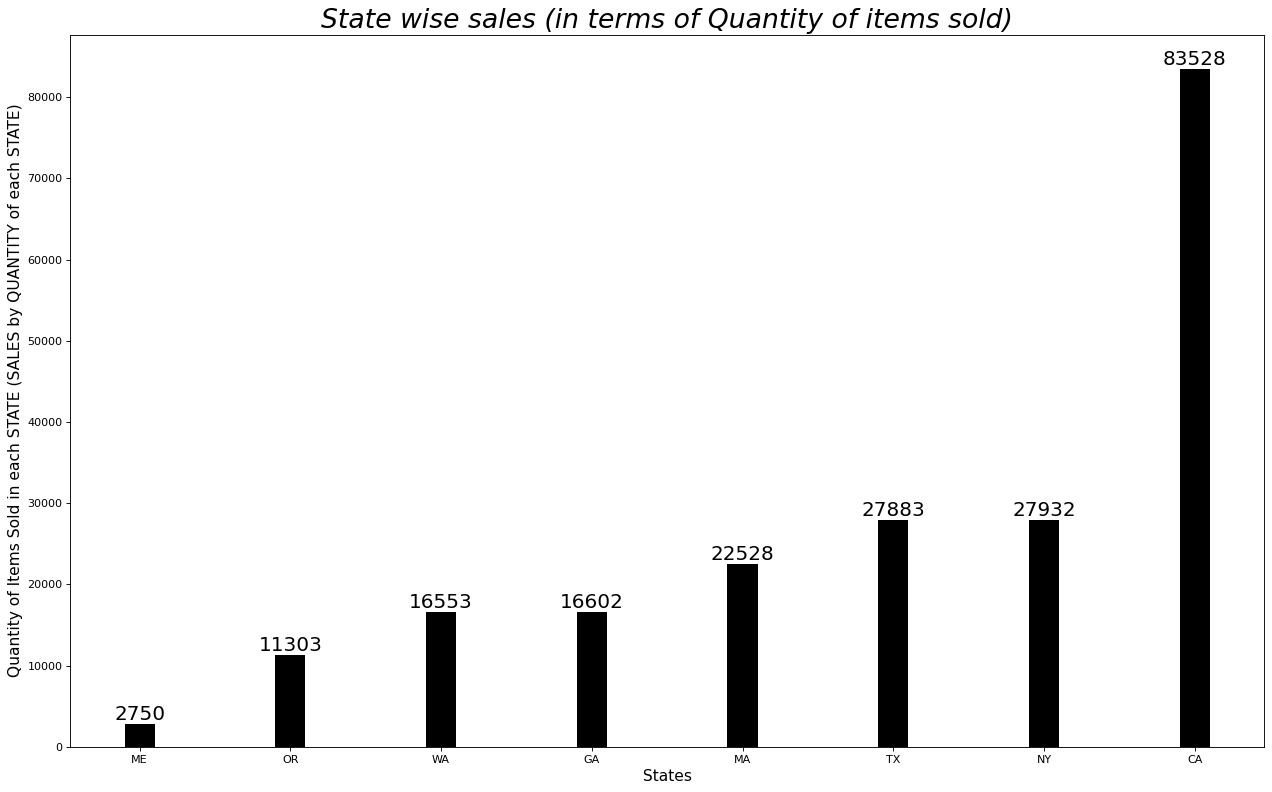

In [13]:
temporary_storage_4 = pnd.DataFrame(data.groupby('State')['Quantity_Ordered'].sum()).sort_values('Quantity_Ordered')

plt.figure(figsize=(16,10), dpi = 80)
plt.bar(temporary_storage_4.index, temporary_storage_4["Quantity_Ordered"], width=.2, color = "black")
plt.xlabel(" States ", fontdict={'fontweight':500, 'size':14})
plt.ylabel(" Quantity of Items Sold in each STATE (SALES by QUANTITY of each STATE) ",fontdict={'fontweight':500, 'size':14})
plt.title("State wise sales (in terms of Quantity of items sold)", fontdict={'fontweight':200, 'size':24,'fontstyle':'italic'})

for i, val in enumerate(temporary_storage_4["Quantity_Ordered"].values):
    plt.text(i, val, val, ha='center', va='bottom', fontdict={'fontweight':500, 'size':18})
    
plt.tight_layout()
plt.show()

## Inference [State wise sales w.r.t Quantity]

`Following the region wise manifestations of sales, this bar graph evinces the sales of Quantity of items in each state. California with highest sum and Maine with least. Again certain factors can be taken into consideration, can be viewed from different perspectives that recognition of store is more on the west coast and Northeast Region and less in the central parts of the United States of America`

------------------------------------------------
#### VIZ 5
##### Visualising Sales City Wise (w.r.t revenue generated).
------------------------------------------------

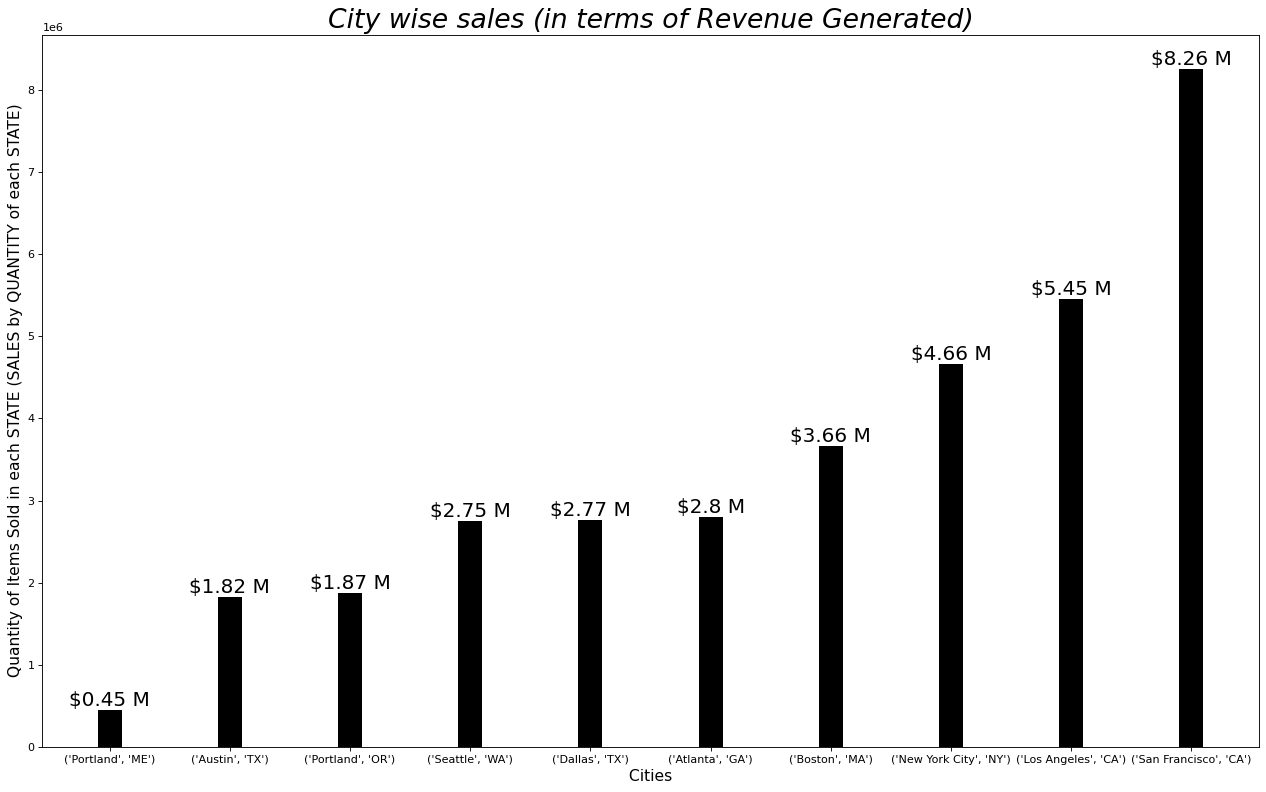

In [14]:
temporary_storage_5 = pnd.DataFrame(data.groupby(['City','State'])['Revenue'].sum()).sort_values('Revenue')
temporary_storage_5

plt.figure(figsize=(16,10), dpi = 80)
plt.bar(pnd.DataFrame(temporary_storage_5.index)[0].astype("string"), temporary_storage_5["Revenue"], width=.2, color = "black")
plt.xlabel(" Cities ", fontdict={'fontweight':500, 'size':14})
plt.ylabel(" Quantity of Items Sold in each STATE (SALES by QUANTITY of each STATE) ",fontdict={'fontweight':500, 'size':14})
plt.title("City wise sales (in terms of Revenue Generated)", fontdict={'fontweight':200, 'size':24,'fontstyle':'italic'})

for i, val in enumerate(temporary_storage_5["Revenue"].values):
    plt.text(i, val, "$" + str(round(val/1000000,2))+" M", ha='center', va='bottom', fontdict={'fontweight':500, 'size':18})
    
plt.tight_layout()
plt.show()


## Inference [City wise sales w.r.t Revenue]

`Followed from the above graphs and charts, the revenue genration follows the trends of Quamtity of items sold. The more the number of items being sold, the greater the earnings.` 

------------------------------------------------
#### VIZ 6
##### Visualising Sales State wise (w.r.t Revenue Generated)
------------------------------------------------

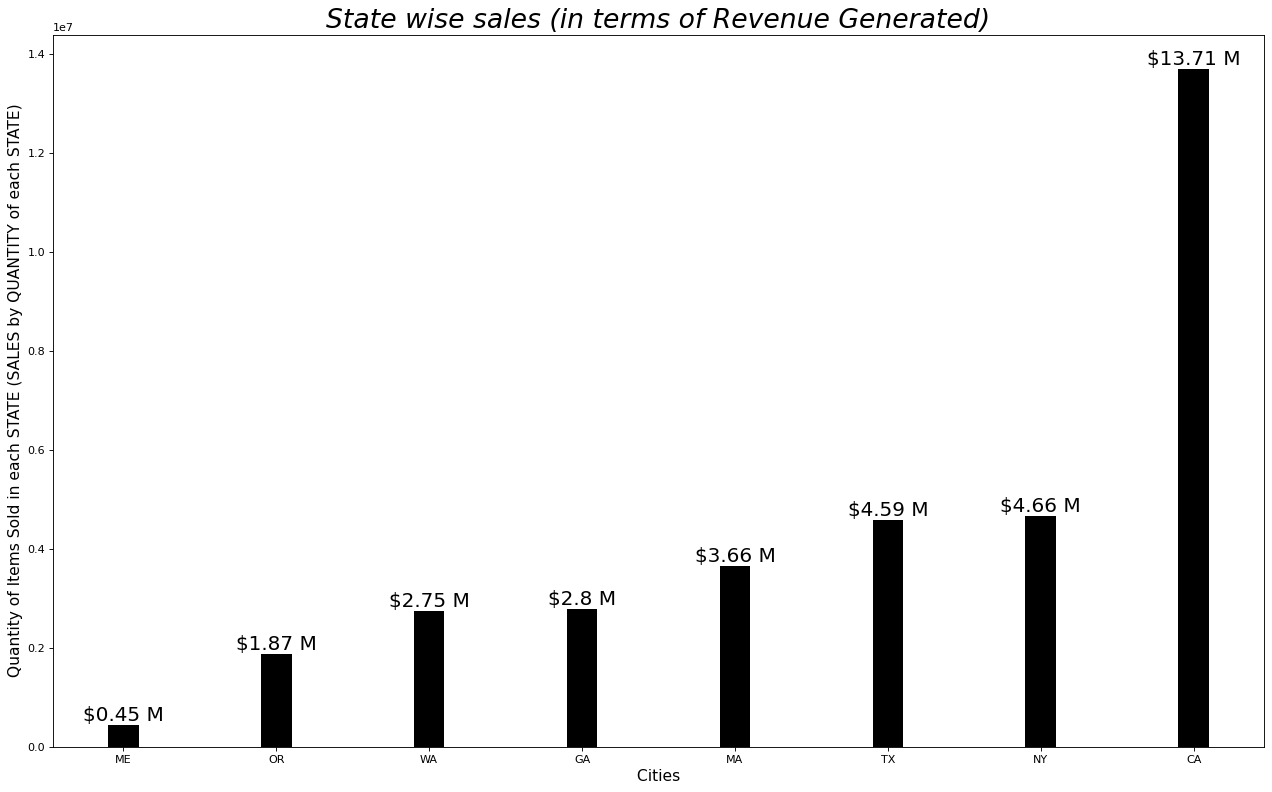

In [15]:
temporary_storage_6 = pnd.DataFrame(data.groupby('State')['Revenue'].sum()).sort_values('Revenue')
temporary_storage_6

plt.figure(figsize=(16,10), dpi = 80)
plt.bar(temporary_storage_6.index, temporary_storage_6["Revenue"], width=.2, color = "black")
plt.xlabel(" Cities ", fontdict={'fontweight':500, 'size':14})
plt.ylabel(" Quantity of Items Sold in each STATE (SALES by QUANTITY of each STATE) ",fontdict={'fontweight':500, 'size':14})
plt.title("State wise sales (in terms of Revenue Generated)", fontdict={'fontweight':200, 'size':24,'fontstyle':'italic'})

for i, val in enumerate(temporary_storage_6["Revenue"].values):
    plt.text(i, val, "$" + str(round(val/1000000,2))+" M", ha='center', va='bottom', fontdict={'fontweight':500, 'size':18})
    
plt.tight_layout()
plt.show()


## Inference [State wise sales w.r.t Revenue]

`Followed from the above graphs and charts, the revenue genration follows the trends of Quamtity of items sold. The more the number of items being sold, the greater the earnings.` 

------------------------------------------------
#### VIZ 7
##### Visualising top ten products based on the sales.
------------------------------------------------

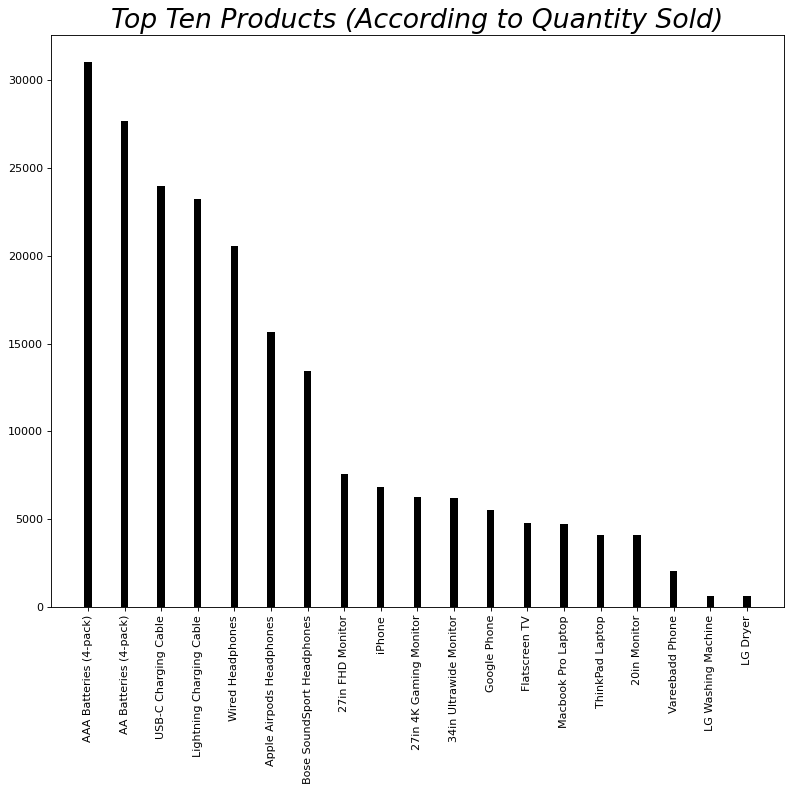

In [16]:
temporary_storage_7 = pnd.DataFrame(data.groupby('Product')['Quantity_Ordered'].sum()).sort_values(by=["Quantity_Ordered"],ascending=False)
temporary_storage_7

plt.figure(figsize=(10,10),dpi=80)
plt.bar(temporary_storage_7.index,temporary_storage_7["Quantity_Ordered"],width=.2, color = "black")
plt.xticks(rotation=90)
plt.title("Top Ten Products (According to Quantity Sold)", fontdict={'fontweight':200, 'size':24,'fontstyle':'italic'})


plt.tight_layout()
plt.show()


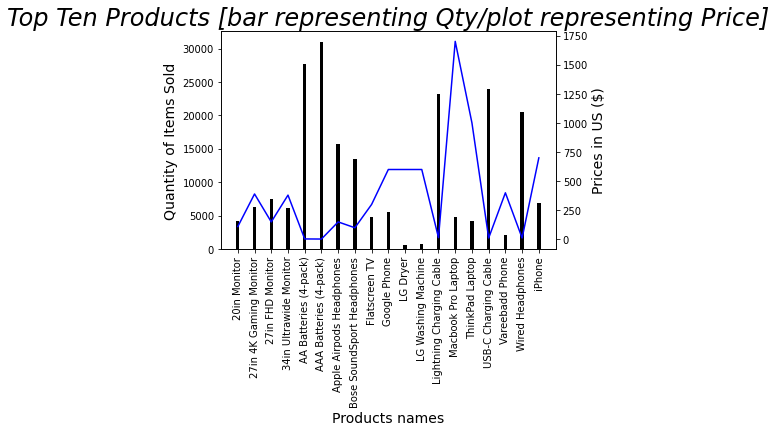

In [17]:
temporary_storage_7_1 = pnd.DataFrame(data.groupby('Product')['Quantity_Ordered'].sum())
prices = data.groupby("Product").mean()["Price_Each"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(temporary_storage_7_1.index,temporary_storage_7_1["Quantity_Ordered"],width=.2, color = "black")
ax2.plot(temporary_storage_7_1.index, prices, 'b-')

ax1.set_xticklabels(temporary_storage_7_1.index, rotation=90)
ax1.set_xlabel("Products names", fontdict={'fontweight':500, 'size':14})
ax1.set_ylabel("Quantity of Items Sold", fontdict={'fontweight':500, 'size':14})
ax2.set_ylabel("Prices in US ($)", fontdict={'fontweight':500, 'size':14})

plt.title("Top Ten Products [bar representing Qty/plot representing Price]", fontdict={'fontweight':200, 'size':24,'fontstyle':'italic'})
plt.show()


## Inference [Top ten Products]

`The above two Graphs solely represent the best selling products. The first graph represents the best products being sold based on the quantity of product sold, in order of higest to lowest. The second graph evinces a contrast of the best selling products and their prices, which were not very surprisingly inversely proportional.`

------------------------------------------------
#### VIZ 8
##### At what time of the day, Maximum Orders are placed?
------------------------------------------------

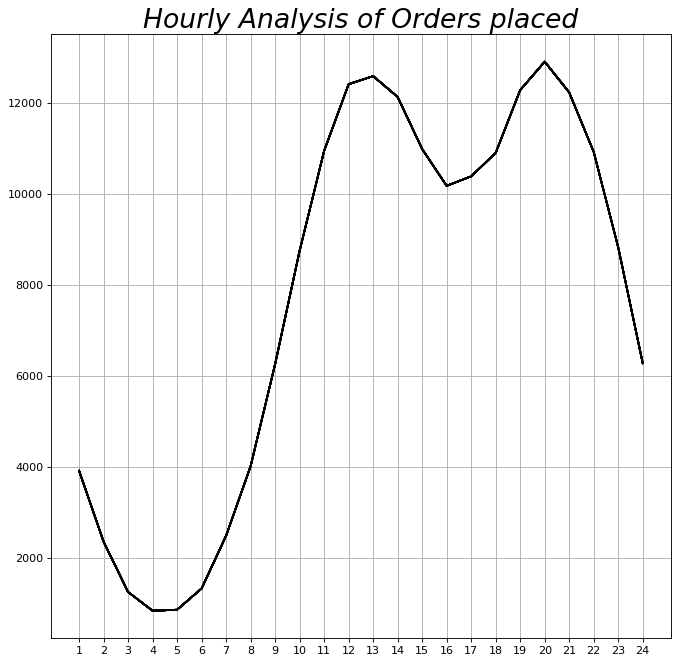

In [18]:
hr = range(1,25)
plt.figure(figsize=(10,10),dpi=80)
plt.plot(hr, data.groupby(["Hours"]).count(),color="black")
plt.xticks(hr)
plt.grid()
plt.title("Hourly Analysis of Orders placed", fontdict={'fontweight':200, 'size':24,'fontstyle':'italic'})
plt.show()

## Inference [Time of Sales or Order placed]

`The above pictorial presentaion inferences the specific time during the day when oreder is placed. It can be perceived that the maximum amount of orders come in during the 13th hour of the day and the 20th hour of the day. Mostly can be generalised as the lunch break hours and the stereotypical conventional after office hours, when people take a break from their busy schedules, take minds off their works and find recreation in online shopping.`

------------------------------------------------
#### VIZ 9
##### Products that are often sold Together.(incombinations of 2)
------------------------------------------------

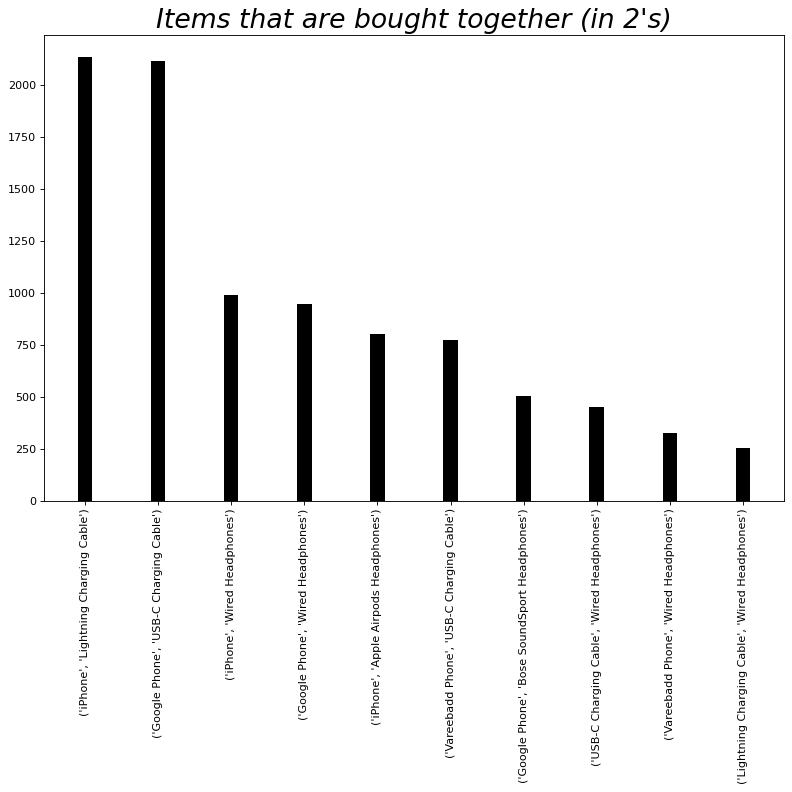

In [19]:
"""
First we subset the original df by selecting only the duplicated values,
Then we groupby those duplicated values and join their corresponding products in order to form combinations,
Then we drop the duplicates from the fragment that we created.
"""
temporary_storage_8 = data[data.duplicated(subset=["Order_ID"], keep=False)]
temporary_storage_8['Product'] = temporary_storage_8.groupby(['Order_ID'])['Product'].transform(lambda x : ','.join(x))
temporary_storage_8 = temporary_storage_8.drop_duplicates()

cnt = Counter()
for cmb in temporary_storage_8["Product"]:
    lst_of_cmb = cmb.split(",")
    cnt.update(Counter(combinations(lst_of_cmb, 2))) #2 represents the items in pairs of 2 (can be done n frequency)

temporary_storage_8_1 = pnd.DataFrame(cnt.most_common(10))
temporary_storage_8_1[0] = temporary_storage_8_1[0].astype("string")

plt.figure(figsize=(10,10),dpi=80)
plt.bar(temporary_storage_8_1[0],temporary_storage_8_1[1],width=.2, color = "black")
plt.xticks(rotation=90)
plt.title("Items that are bought together (in 2's)", fontdict={'fontweight':200, 'size':24,'fontstyle':'italic'})


plt.tight_layout()
plt.show()


------------------------------------------------
#### VIZ 10
##### Products that are often sold Together.(incombinations of 3)
------------------------------------------------

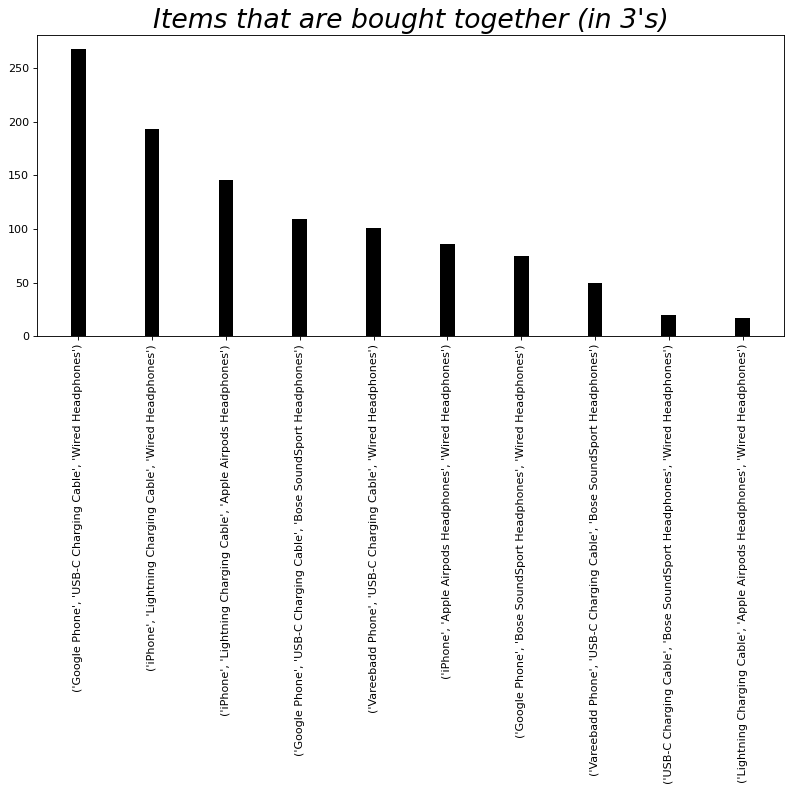

In [20]:
"""
First we subset the original df by selecting only the duplicated values,
Then we groupby those duplicated values and join their corresponding products in order to form combinations,
Then we drop the duplicates from the fragment that we created.
"""
temporary_storage_8 = data[data.duplicated(subset=["Order_ID"], keep=False)]
temporary_storage_8['Product'] = temporary_storage_8.groupby(['Order_ID'])['Product'].transform(lambda x : ','.join(x))
temporary_storage_8 = temporary_storage_8.drop_duplicates()

cnt = Counter()
for cmb in temporary_storage_8["Product"]:
    lst_of_cmb = cmb.split(",")
    cnt.update(Counter(combinations(lst_of_cmb, 3))) #2 represents the items in pairs of 2 (can be done n frequency)

temporary_storage_8_1 = pnd.DataFrame(cnt.most_common(10))
temporary_storage_8_1[0] = temporary_storage_8_1[0].astype("string")

plt.figure(figsize=(10,10),dpi=80)
plt.bar(temporary_storage_8_1[0],temporary_storage_8_1[1],width=.2, color = "black")
plt.xticks(rotation=90)
plt.title("Items that are bought together (in 3's)", fontdict={'fontweight':200, 'size':24,'fontstyle':'italic'})


plt.tight_layout()
plt.show()


## Inference [Frequently bought together items (in 2's and 3's)]

`The graph above depicts the pairs of products that are always bought together, and is listed in descending order of the number of times the sales happened in pairs. Like for instance, If a customers buys an Iphone, the customer also orders the lightning USB cable along with it. Based on such Observations, if some other customer comes on to the platform to buy an Iphone, the Online Selling Platform will recommend the customer if he/she wants to buy the lightning USB cable also. This will increase the sales as many of the customer base can be recommended items they never knew they needed it in the first place.`